<h1> Exploring Citi Bike / Dock Availability. </h1>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
# Plot preferences.
pl.rcParams.update({'font.size':22})

In [3]:
# Load Historical data.
df = pd.read_csv('../data/citibike/dock_historical/historical_data.csv', index_col=0)

/home/mark/anaconda3/envs/inapinch/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df.time = pd.to_datetime(df.time)

/home/mark/anaconda3/envs/inapinch/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/mark/anaconda3/envs/inapinch/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


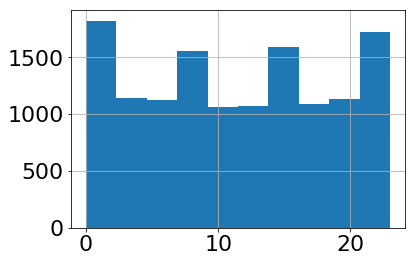

In [5]:
temp = df.query('dock_id == 314')
temp.loc[:, 'hour'] = temp.time.dt.hour
temp.loc[:, 'weekday'] = temp.time.dt.weekday
temp.hour.hist();

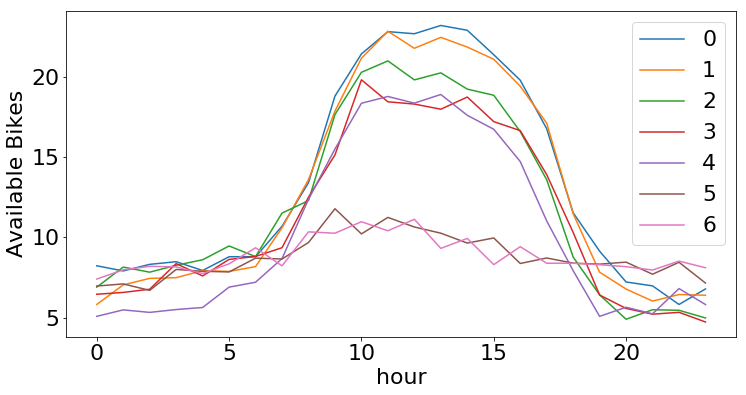

In [6]:
fig, ax = pl.subplots(figsize=(12,6))
for name, group in temp.groupby(['weekday']):
    group.groupby('hour')['avail_bikes'].mean().plot(ax=ax, label=name)
ax.legend()
ax.set_ylabel('Available Bikes');

In [7]:
df['month'] = df.time.dt.month
df['hour'] = df.time.dt.hour
df['weekday'] = df.time.dt.weekday
df['quarter'] = df.time.dt.quarter

In [ ]:
df.head()

In [ ]:
%timeit df.query('dock_id == 72 and quarter == 1 and weekday == 1 and hour == 12')

In [ ]:
df.set_index(['dock_id', 'quarter', 'weekday', 'hour'], inplace=True)

In [ ]:
df.head()

In [ ]:
%timeit df.loc[72,4,1,12]

In [ ]:
df.sort_index(inplace=True)

In [ ]:
%timeit df.loc[72,4,1,12]

In [ ]:
%timeit df.query('dock_id == 72 and quarter == 1 and weekday == 1 and hour == 12')

In [ ]:
fig, ax = pl.subplots()
df.loc[314, 3, 2,19]['avail_docks'].hist(ax=ax)
ax.set_xlim(0,35)

In [ ]:
for i in range(0,24):
    print(df.loc[314,3,3,i].avail_bikes.mean())

<h1> How long do docks remain empty or full </h1>